In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import warnings
warnings.filterwarnings('ignore')

C:\Users\SKS\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## MLP+ReLU+Adam+Dropout+Batch_Normalization with 2 Layers

In [10]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Activation

model = Sequential()
model.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(210, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 420)               329700    
_________________________________________________________________
batch_normalization_1 (Batch (None, 420)               1680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 210)               88410     
_________________________________________________________________
batch_normalization_2 (Batch (None, 210)               840       
_________________________________________________________________
dropout_2 (Dropout)  

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.3248 - acc: 0.8992 - val_loss: 0.1259 - val_acc: 0.9603
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1656 - acc: 0.9498 - val_loss: 0.0959 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1315 - acc: 0.9586 - val_loss: 0.0815 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1144 - acc: 0.9645 - val_loss: 0.0738 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1025 - acc: 0.9675 - val_loss: 0.0716 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0935 - acc: 0.9702 - val_loss: 0.0632 - val_acc: 0.9816
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - 

Test score: 0.05491300562793331
Test accuracy: 0.9844


<IPython.core.display.Javascript object>


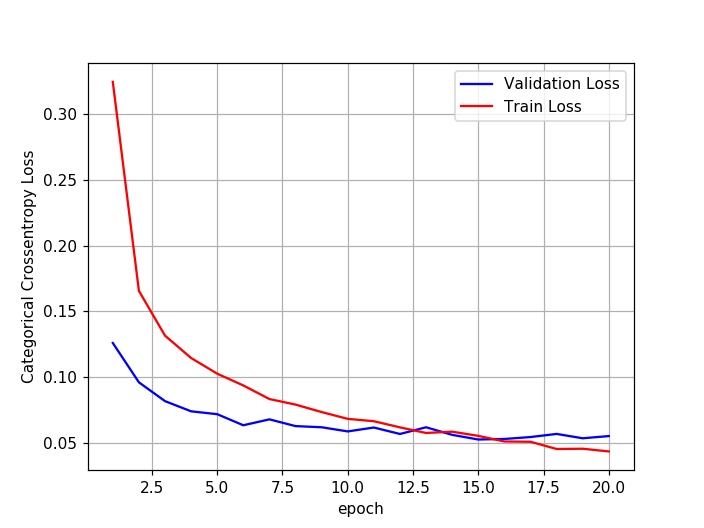

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Here we can see that there is no overfitting till 20 Epochs as Training and Validation loss are very similar

<IPython.core.display.Javascript object>


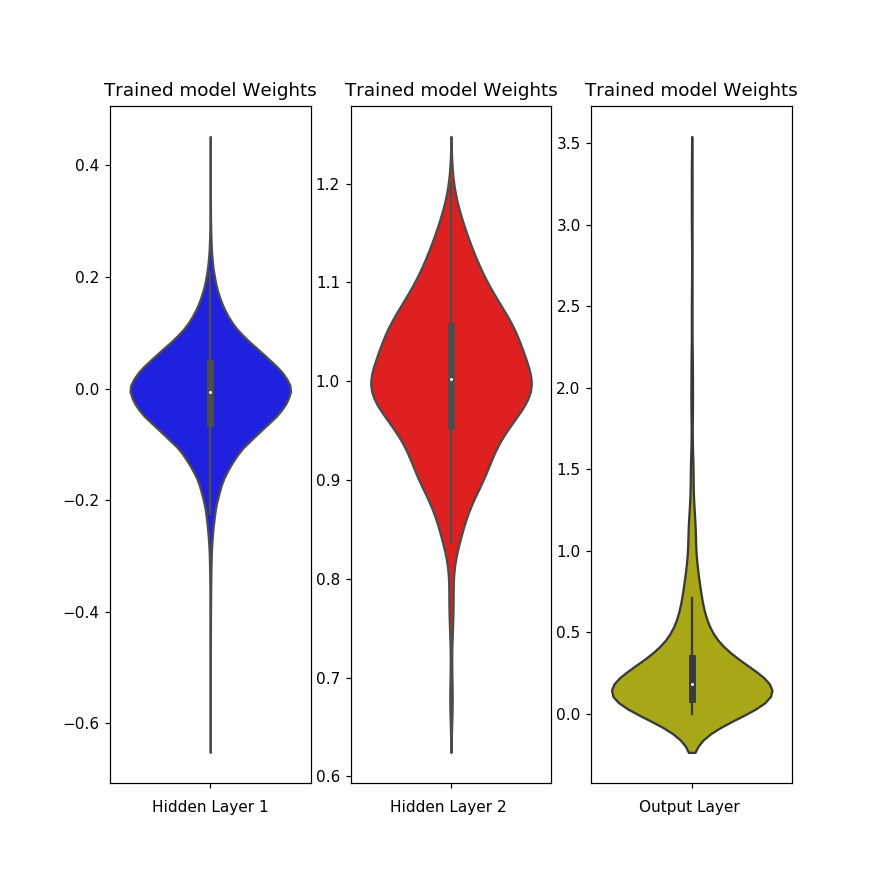

In [13]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Here we used 420 ReLU Activated Neurons in First Hidden layer and 210 ReLU Activated Neurons in Second Hidden Layer and Test accuracy is 98.44%, after first hidden layer we use dropout with rate of 0.5 and after 2nd Hidden layer with rate of 0.25

## MLP+ReLU+Adam+Dropout+Batch_Normalization with 3 Layers

In [14]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Activation

model = Sequential()
model.add(Dense(630, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(320, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(210, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 630)               494550    
_________________________________________________________________
batch_normalization_3 (Batch (None, 630)               2520      
_________________________________________________________________
dropout_3 (Dropout)          (None, 630)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 320)               201920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 320)               1280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 210)               67410     
__________

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.3599 - acc: 0.8884 - val_loss: 0.1242 - val_acc: 0.9606
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1749 - acc: 0.9467 - val_loss: 0.0926 - val_acc: 0.9707
Epoch 3/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1368 - acc: 0.9577 - val_loss: 0.0732 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1179 - acc: 0.9632 - val_loss: 0.0743 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1079 - acc: 0.9657 - val_loss: 0.0708 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0959 - acc: 0.9703 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0868 - acc: 0.9730 - val_loss: 0.0584 -

Test score: 0.046710745598140056
Test accuracy: 0.9862


<IPython.core.display.Javascript object>


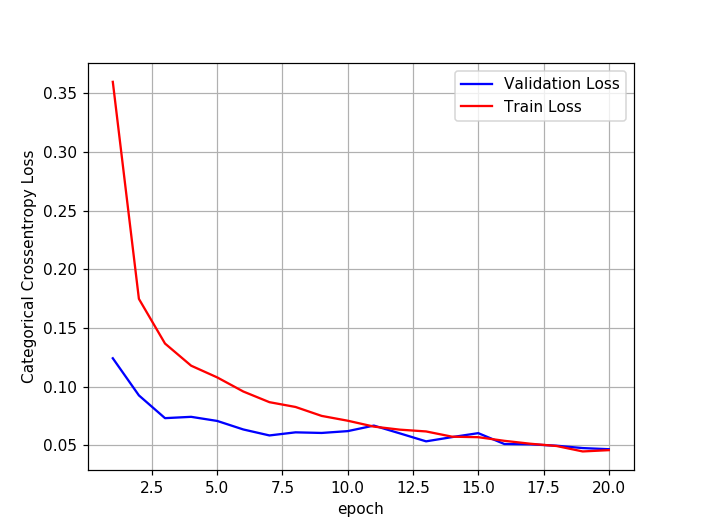

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Here we can see that there is no overfitting till 20 Epochs as Training and Validation loss are very similar 

#### Here we used 630 ReLU Activated Neurons in First Hidden layer and 320 ReLU Activated Neurons in Second Hidden Layer and 210 ReLU Activated Neurons in Third Hidden Layer and Test accuracy is 98.62%, after first hidden layer we use dropout with rate of 0.5 and after 2nd Hidden layer with rate of 0.35 and after 3rd hidden layer with rate 0.25

## MLP+ReLU+Adam+Dropout+Batch_Normalization with 5 Layers

In [17]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Activation

model = Sequential()
model.add(Dense(720, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(620, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(520, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(320, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(220, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 720)               565200    
_________________________________________________________________
batch_normalization_6 (Batch (None, 720)               2880      
_________________________________________________________________
dropout_6 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 620)               447020    
_________________________________________________________________
batch_normalization_7 (Batch (None, 620)               2480      
_________________________________________________________________
dropout_7 (Dropout)          (None, 620)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 520)               322920    
__________

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.4000 - acc: 0.8743 - val_loss: 0.1395 - val_acc: 0.9583
Epoch 2/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.1824 - acc: 0.9439 - val_loss: 0.0995 - val_acc: 0.9693
Epoch 3/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.1490 - acc: 0.9537 - val_loss: 0.0863 - val_acc: 0.9729
Epoch 4/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.1299 - acc: 0.9585 - val_loss: 0.0835 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.1149 - acc: 0.9637 - val_loss: 0.0762 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.1069 - acc: 0.9666 - val_loss: 0.0776 - val_acc: 0.9768 5s - loss: 0.1030 -  - ET
Epoch 7/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0968 - 

Test score: 0.05376902647810057
Test accuracy: 0.9853


<IPython.core.display.Javascript object>


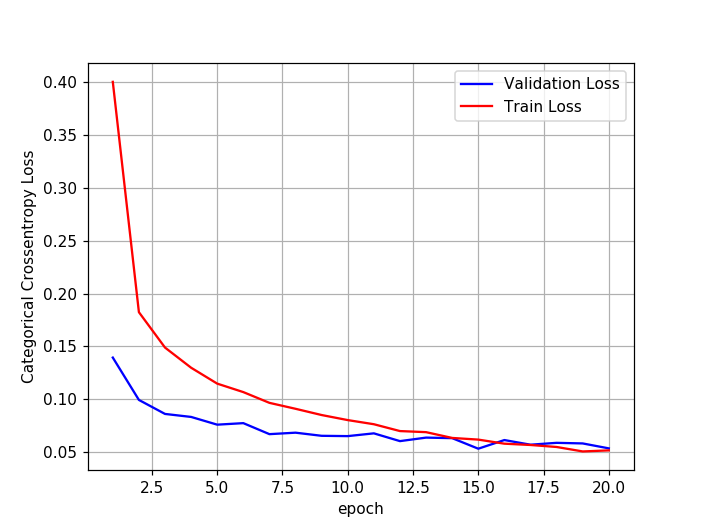

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Here we can see that there is no overfitting till 20 Epochs as Training and Validation loss are very similar

#### Here we used 1024 ReLU Activated Neurons in First Hidden layer and 720 ReLU Activated Neurons in Second Hidden Layer and 520 ReLU Activated Neurons in Third Hidden Layer and 320 ReLU Activated Neurons in Fourth Hidden Layer and 240 ReLU Activated Neurons in Fifth Hidden Layer and Test accuracy is 98.53%  after first hidden layer we use dropout with rate of 0.5 and after 2nd Hidden layer with rate of 0.4 , after 3rd Hidden layer with rate of 0.3,after 4th Hidden layer with rate of 0.2 and after 5th Hidden layer with rate of 0.1

## Conclusion

* Test Accuracy of all 3 Architectures are nearly same
* By Using Different Dropout rates in each layer the accuracy Increases and Training Loss Decreases as compared to using the same dropout rate in each layer
* As MNIST problem is very easy problem so we can't see much differnce between differnet architectures
* But as Complexity of Problems increases we will see so much difference while using different architectures

In [26]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "No._of_Hidden_Layers","Architecture","Dropout_Rates",'Train_Loss','Test_Accuracy']

In [27]:
x.add_row(['2','[784,420,210,10]','[0.50,0.25]','0.043','98.44%'])
x.add_row(['3','[784,630,320,210,10]','[0.50,0.35,0.25]','0.045','98.62%'])
x.add_row(['5','[784,720,620,520,320,220,10]','[0.50,0.40,0.30,0.20,0.10]','0.051','98.53%'])

In [28]:
print(x)

+----------------------+------------------------------+----------------------------+------------+---------------+
| No._of_Hidden_Layers |         Architecture         |       Dropout_Rates        | Train_Loss | Test_Accuracy |
+----------------------+------------------------------+----------------------------+------------+---------------+
|          2           |       [784,420,210,10]       |        [0.50,0.25]         |   0.043    |     98.44%    |
|          3           |     [784,630,320,210,10]     |      [0.50,0.35,0.25]      |   0.045    |     98.62%    |
|          5           | [784,720,620,520,320,220,10] | [0.50,0.40,0.30,0.20,0.10] |   0.051    |     98.53%    |
+----------------------+------------------------------+----------------------------+------------+---------------+
